In [1]:
import pandas as pd
import os

# path = "HyperparameterSearchAllModels"
# path = "Results/LOSO_500msSeq"
path = "Results/LOSO_a200_b300_f44_seq43"
results = pd.read_csv(os.path.join(path, "loso_log.csv"))
results["mean_acc"] = (results["correct_acc"] + results["incorrect_acc"]) / 2
results

,name,model_type,cond,cv_k,test_participant,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,th_percentile,th_value,correct_acc,incorrect_acc,mean_acc
0,TCNAE_1,TCNAE,gaze,0,Pat001,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.280426,0.991525,NaN,NaN
1,TCNAE_1,TCNAE,gaze,1,Pat002,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.216788,0.990826,NaN,NaN
2,TCNAE_1,TCNAE,gaze,2,Pat003,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.149751,0.766169,0.794118,0.780143
3,TCNAE_1,TCNAE,gaze,3,Pat004,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.150508,0.905512,1.000000,0.952756
4,TCNAE_1,TCNAE,gaze,4,Pat005,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.255386,0.987342,0.000000,0.493671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,TCNAE_3,TCNAE,nod,47,Pat048,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.233224,0.980583,0.000000,0.490291
464,TCNAE_3,TCNAE,nod,48,Pat049,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.226962,1.000000,NaN,NaN
465,TCNAE_3,TCNAE,nod,49,Pat050,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.339584,0.944444,0.000000,0.472222
466,TCNAE_3,TCNAE,nod,50,Pat051,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.224404,1.000000,NaN,NaN


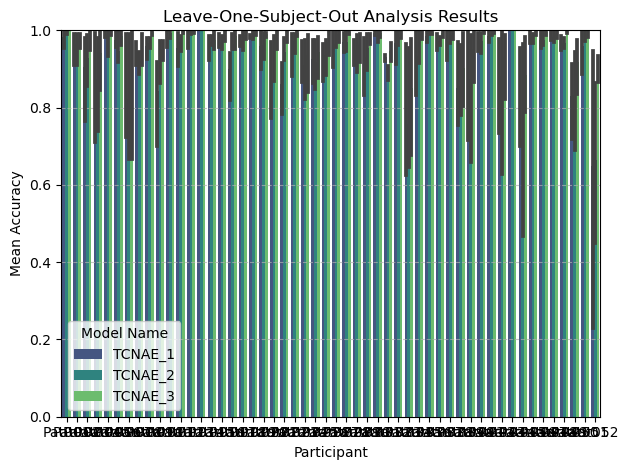

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=results,
    x="test_participant",
    y="correct_acc",
    hue="name",
    palette="viridis"
)

plt.title("Leave-One-Subject-Out Analysis Results",)
plt.xlabel("Participant")
plt.ylabel("Mean Accuracy")
plt.legend(title="Model Name")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

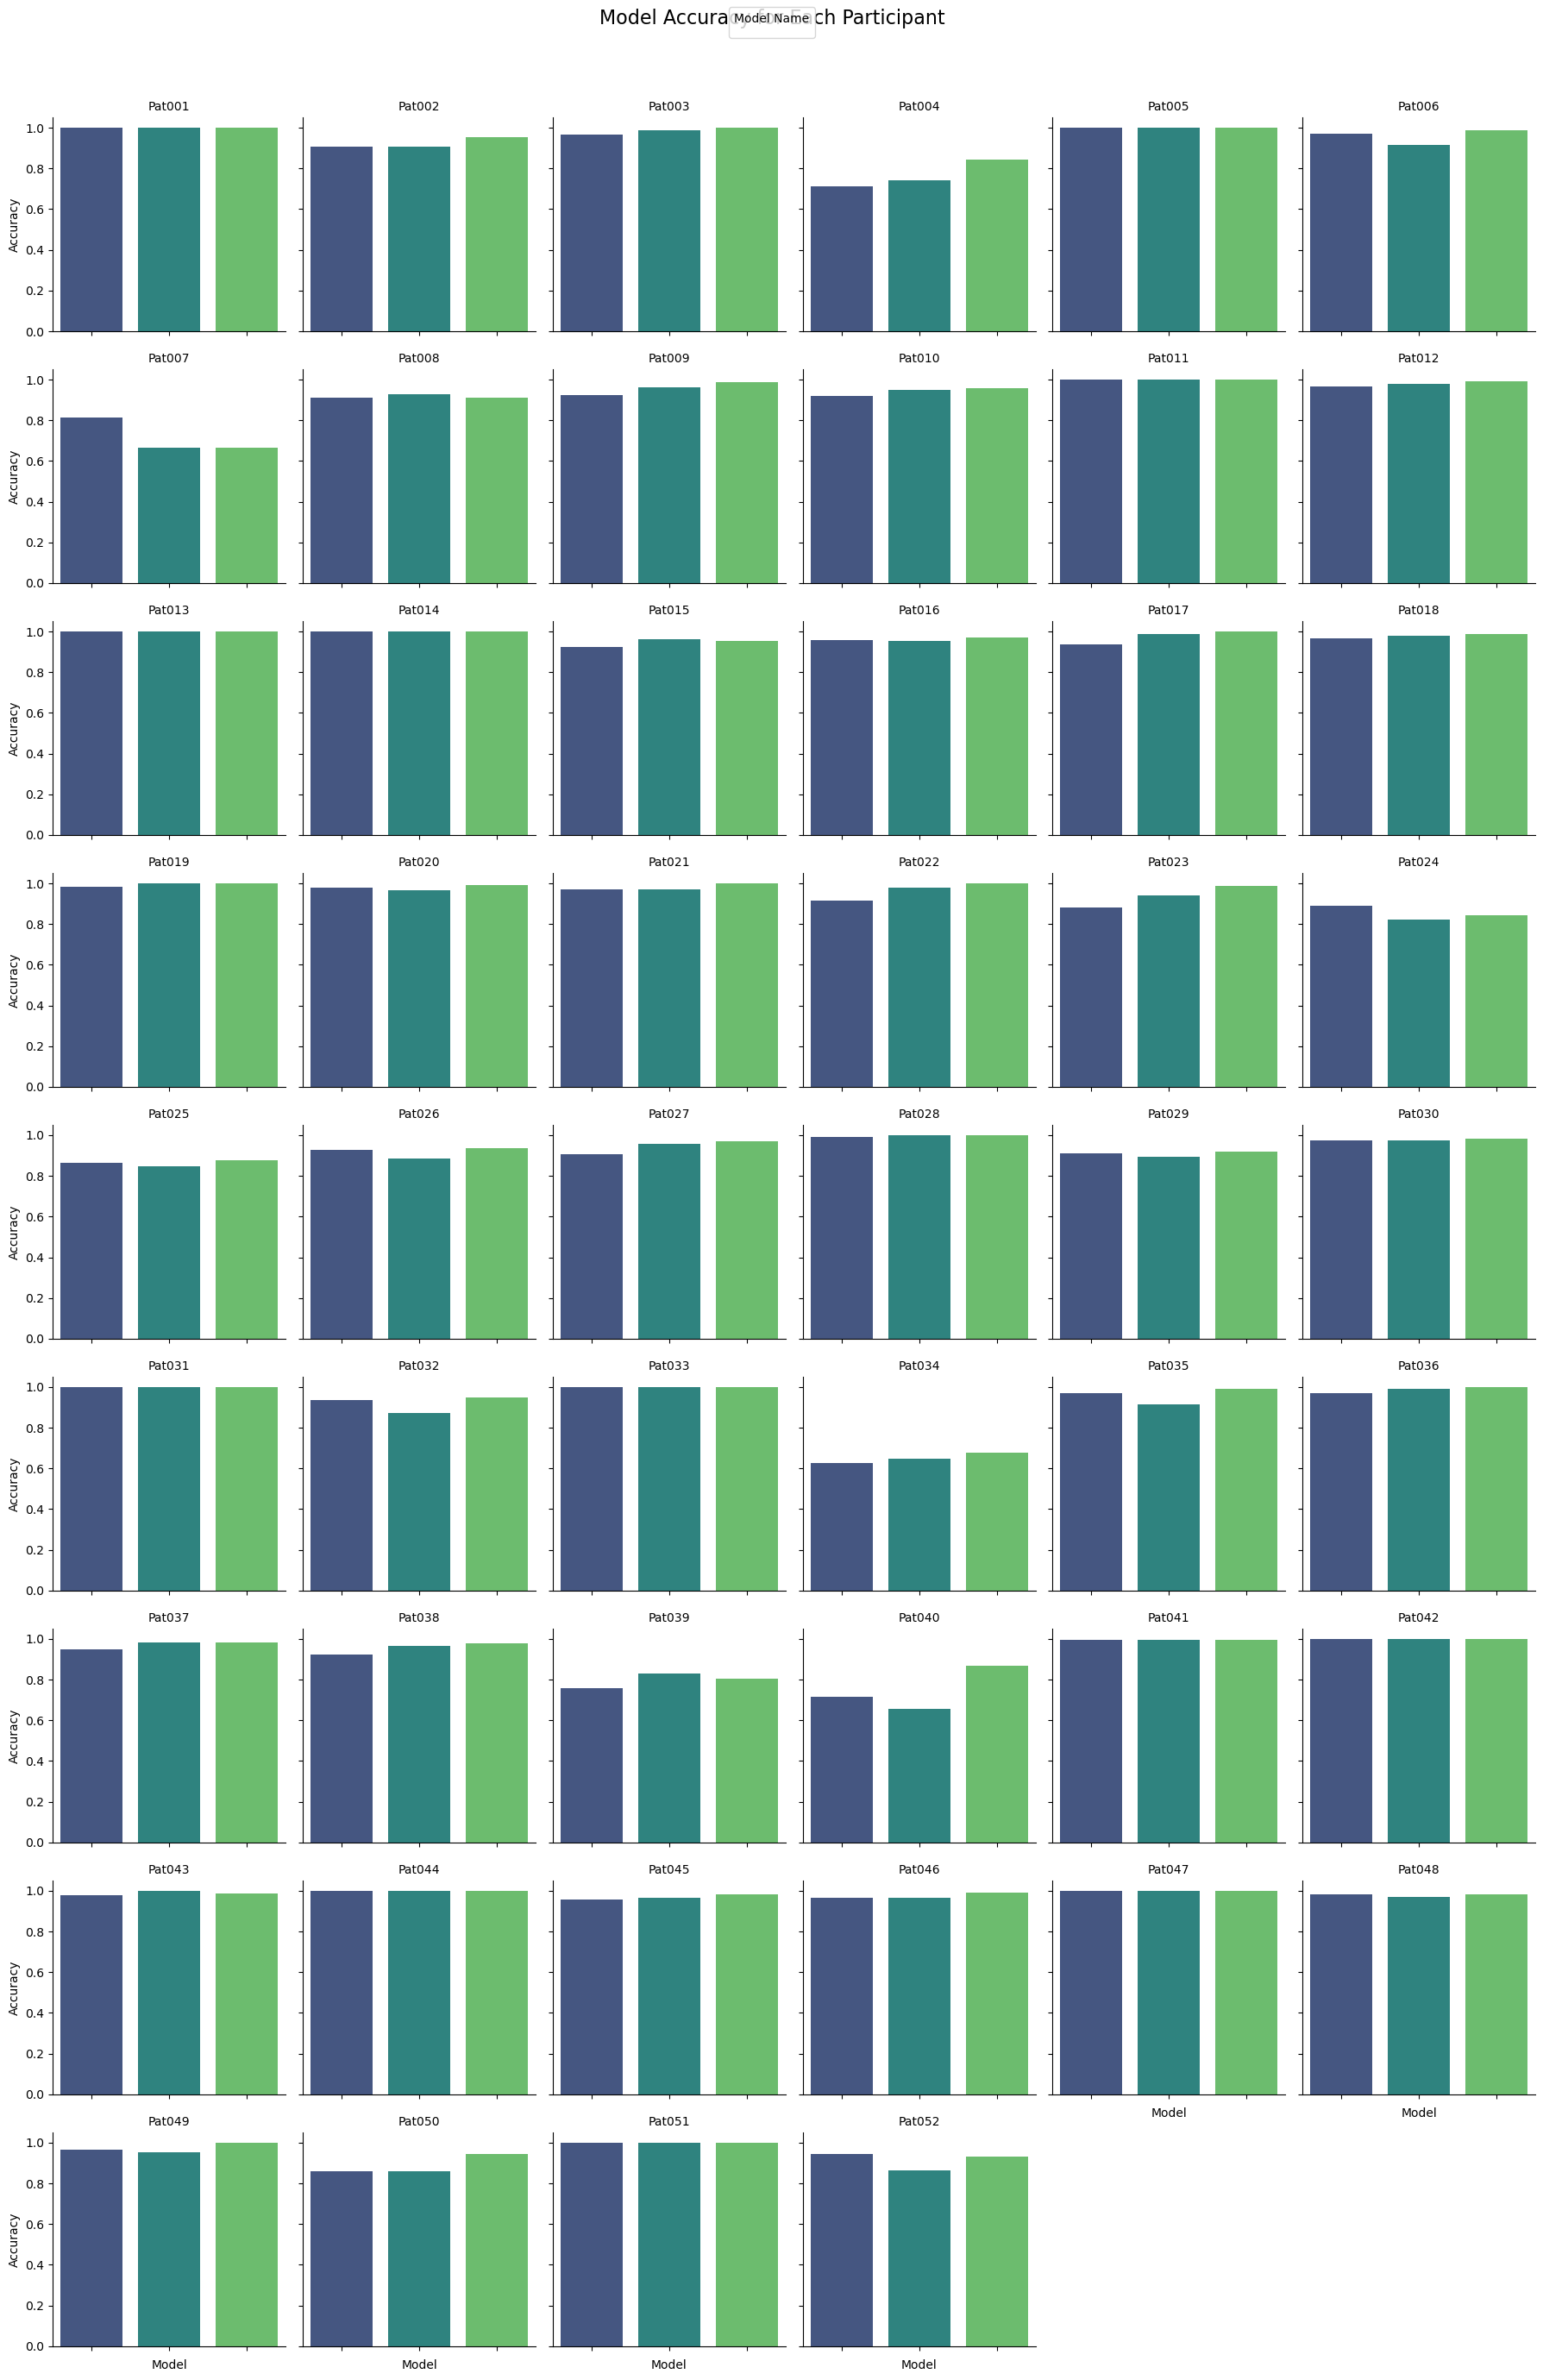

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = results.loc[results.cond=="nod"]

# Create a FacetGrid
g = sns.FacetGrid(df, col="test_participant", col_wrap=6, height=3, sharey=True)
g.map(sns.barplot, "name", "correct_acc", order=df['name'].unique(), palette="viridis")

# Customize the layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Accuracy")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Model Accuracy for Each Participant', y=1.02, fontsize=16)

handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="Model Name", loc='upper center', ncol=3, fontsize=12)


# plt.legend()
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


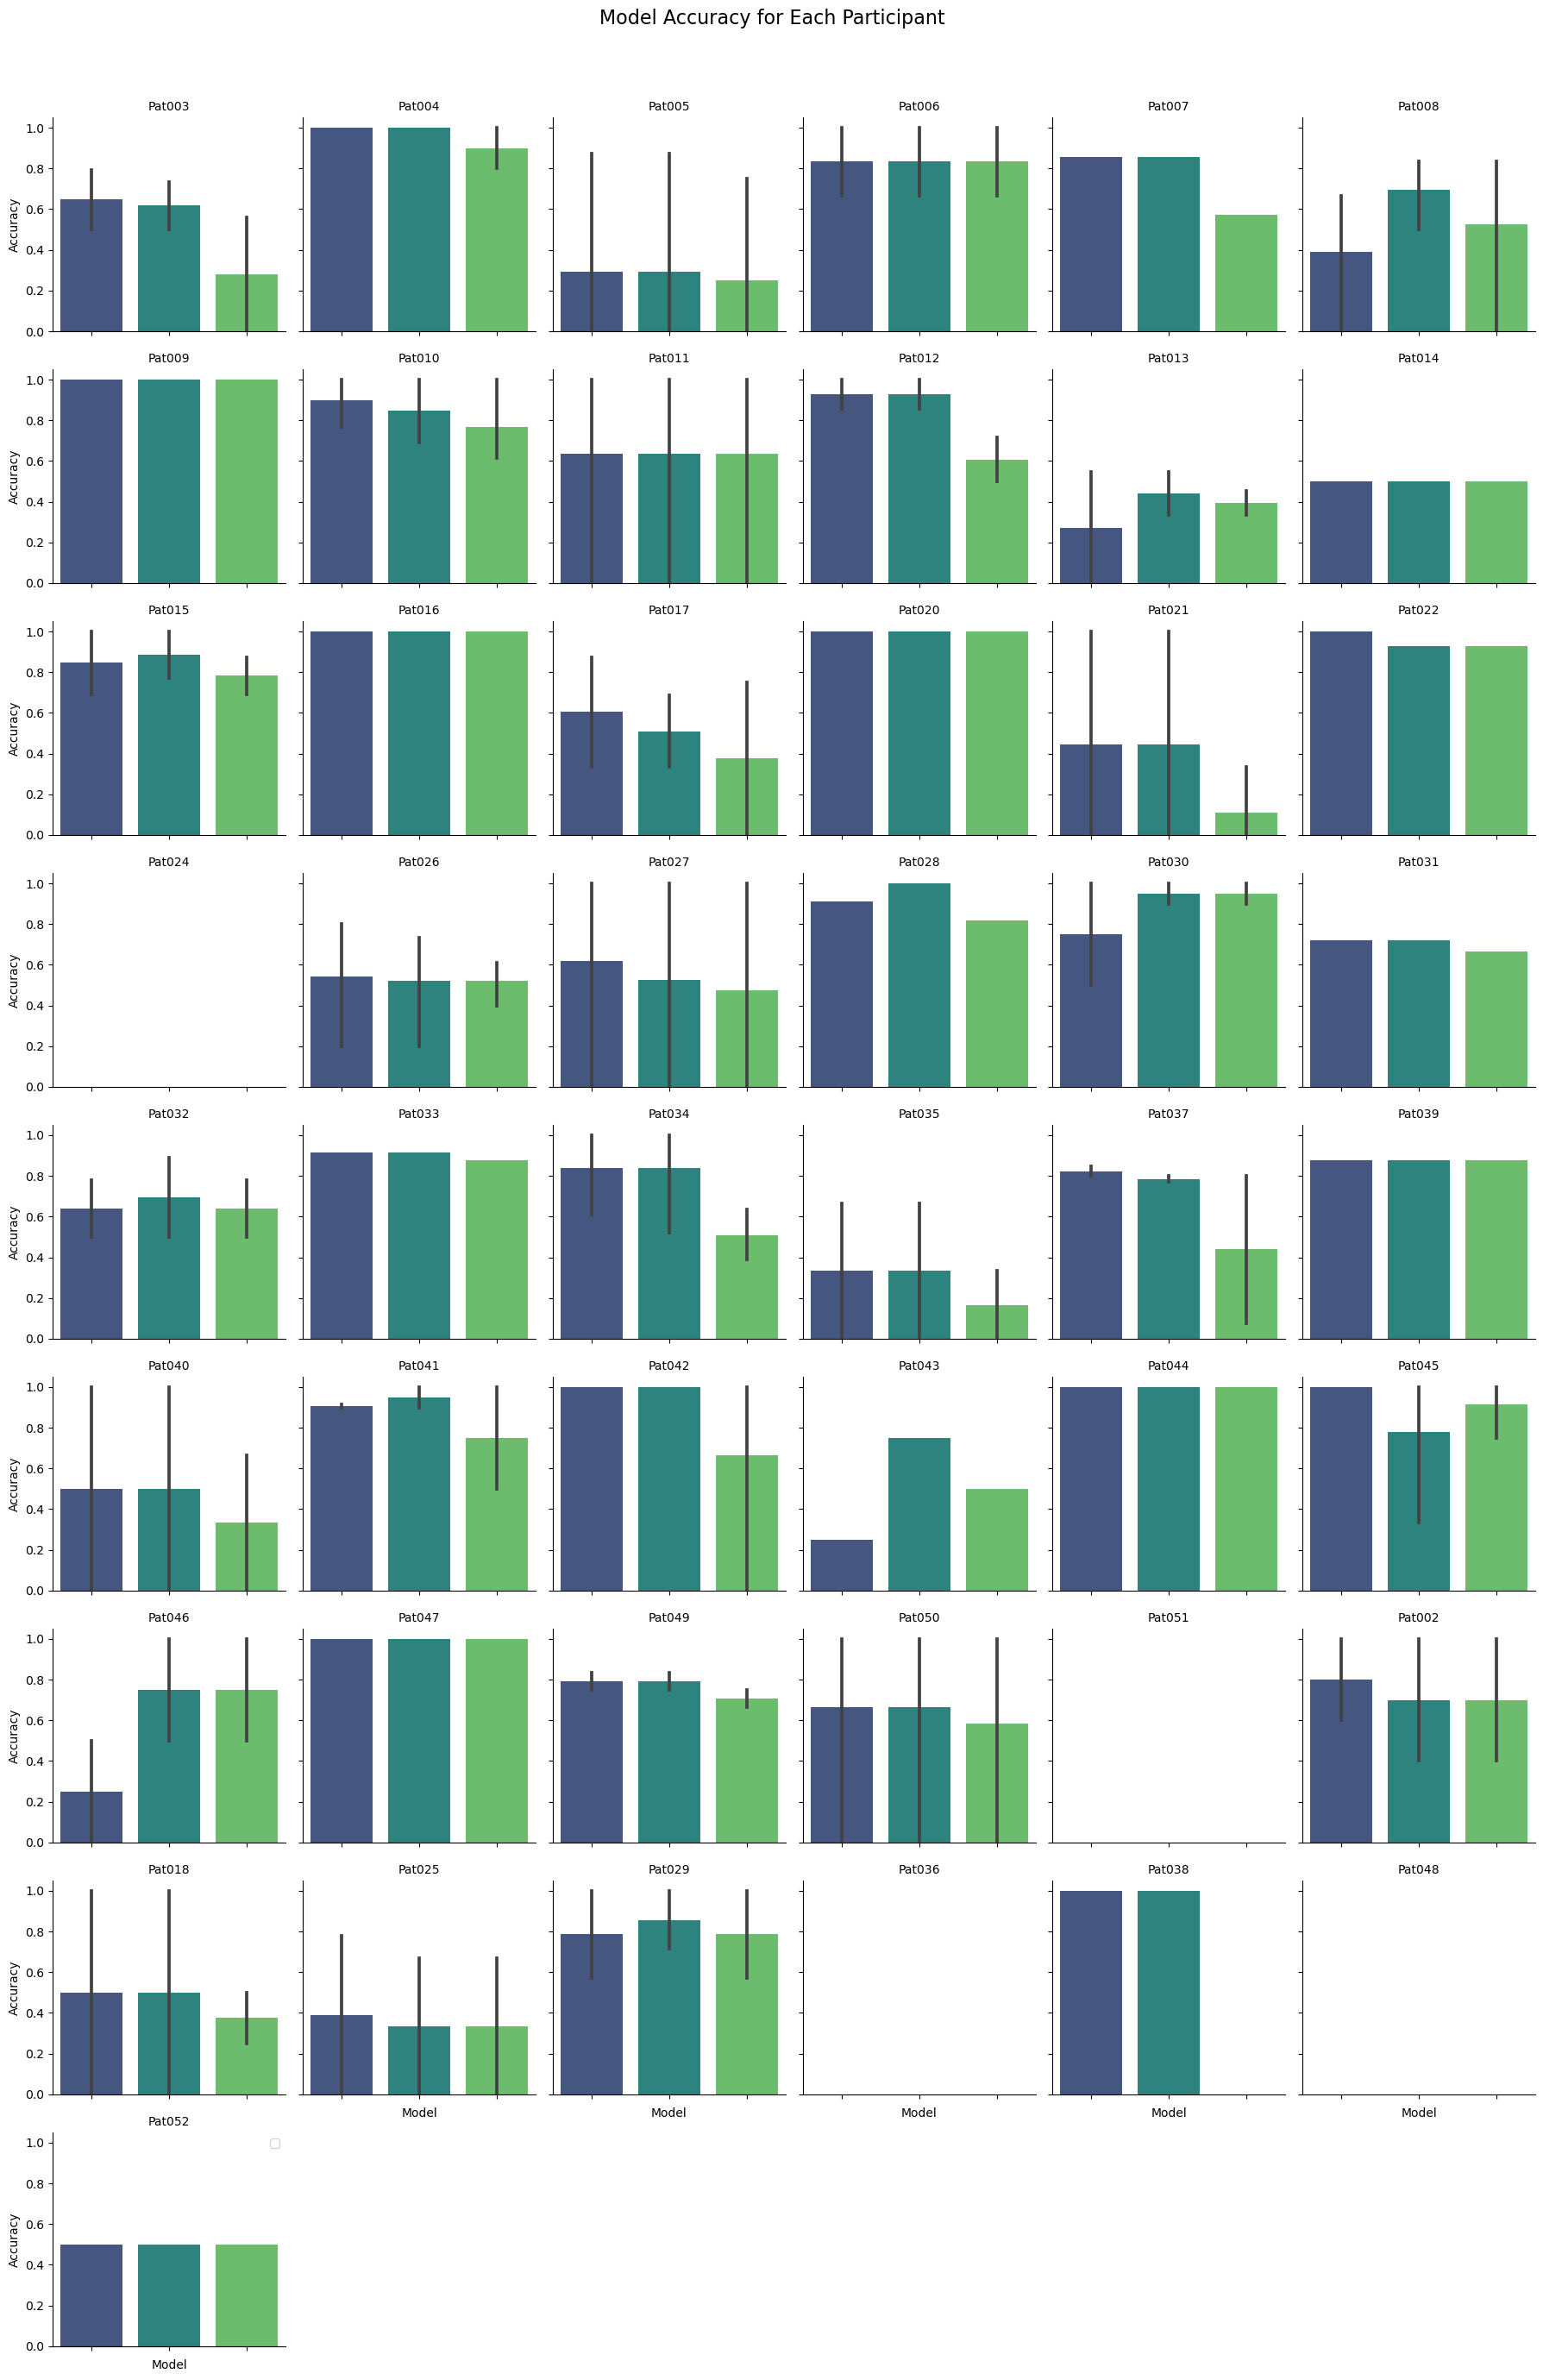

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df = results.loc[~results.incorrect_acc.isna()]

# Create a FacetGrid
g = sns.FacetGrid(df, col="test_participant", col_wrap=6, height=3, sharey=True)
g.map(sns.barplot, "name", "incorrect_acc", order=results['name'].unique(), palette="viridis")

# Customize the layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Accuracy")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Model Accuracy for Each Participant', y=1.02, fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


In [5]:
df

,name,model_type,cond,cv_k,test_participant,hidden_size,num_channels,kernel_size,latent_dim,learning_rate,count_parameter,th_percentile,th_value,correct_acc,incorrect_acc,mean_acc
2,TCNAE_1,TCNAE,gaze,2,Pat003,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.149751,0.766169,0.794118,0.780143
3,TCNAE_1,TCNAE,gaze,3,Pat004,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.150508,0.905512,1.000000,0.952756
4,TCNAE_1,TCNAE,gaze,4,Pat005,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.255386,0.987342,0.000000,0.493671
5,TCNAE_1,TCNAE,gaze,5,Pat006,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.242960,0.957055,0.666667,0.811861
6,TCNAE_1,TCNAE,gaze,6,Pat007,na,"[16, 32, 64]",7,10,0.0010,94349,99,0.121976,0.724638,0.857143,0.790890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,TCNAE_3,TCNAE,nod,44,Pat045,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.234342,0.982143,1.000000,0.991071
461,TCNAE_3,TCNAE,nod,45,Pat046,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.274471,0.991525,0.500000,0.745763
463,TCNAE_3,TCNAE,nod,47,Pat048,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.233224,0.980583,0.000000,0.490291
465,TCNAE_3,TCNAE,nod,49,Pat050,na,"[16, 32, 64]",3,10,0.0001,73741,99,1.339584,0.944444,0.000000,0.472222


C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


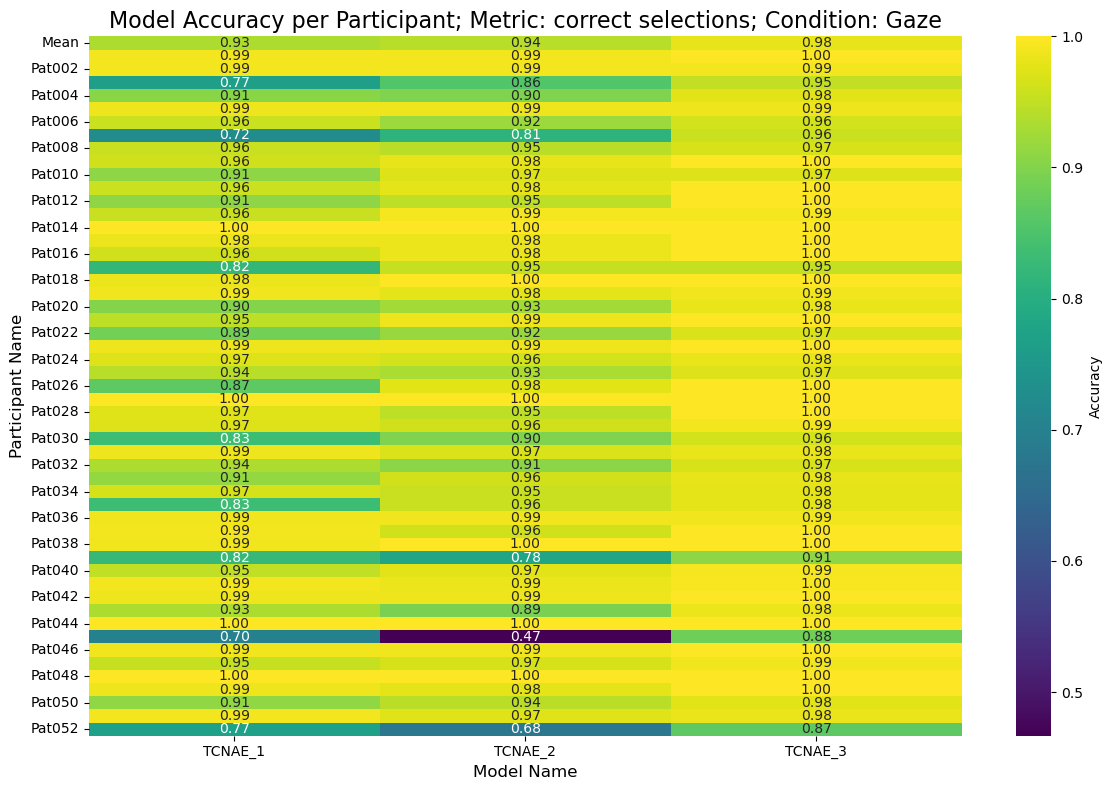

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


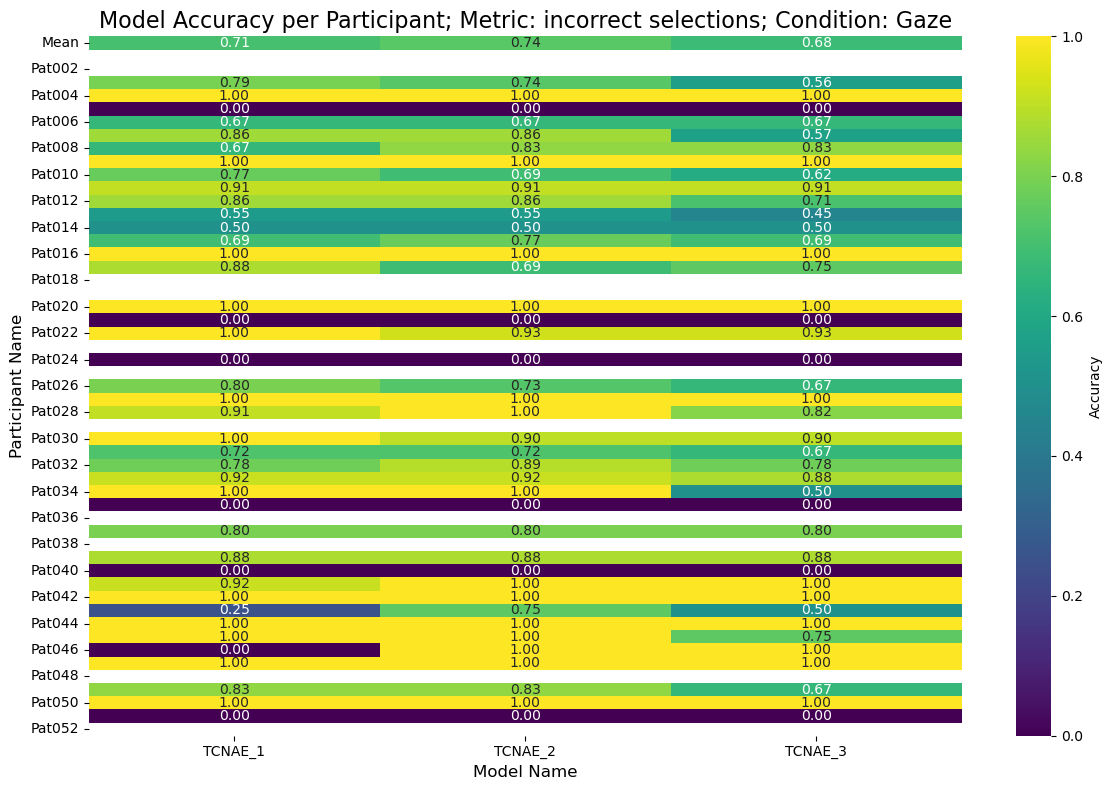

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


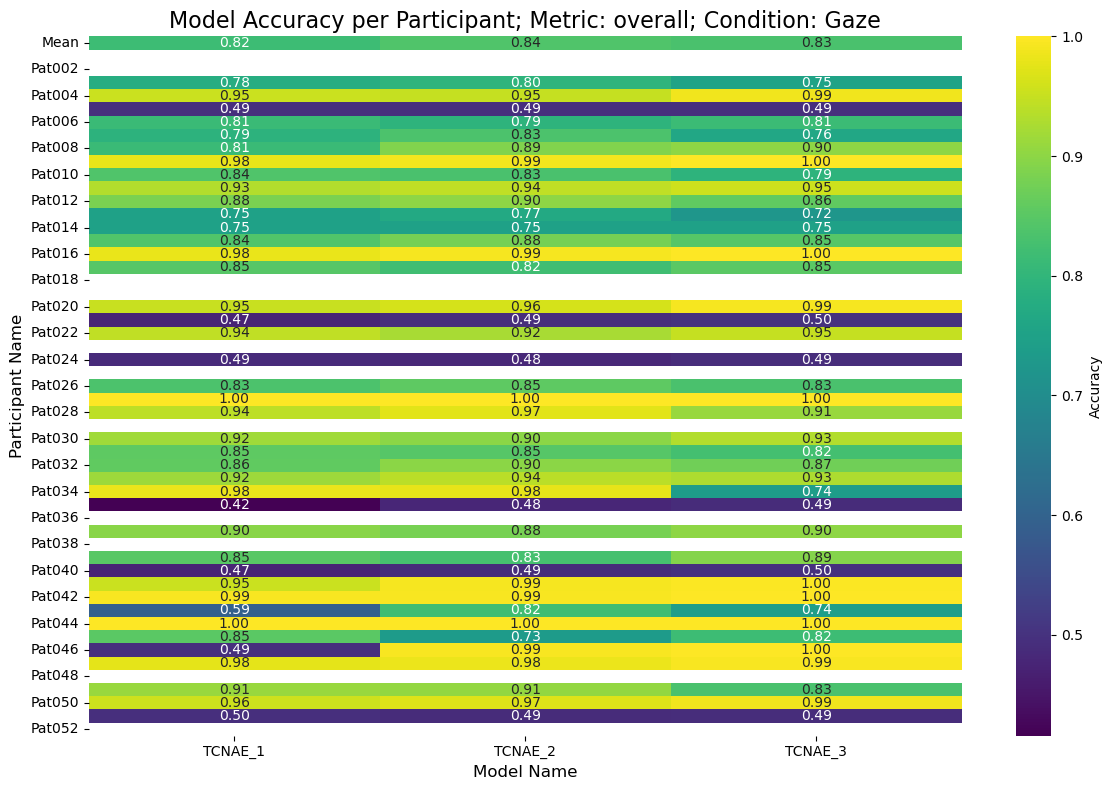

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


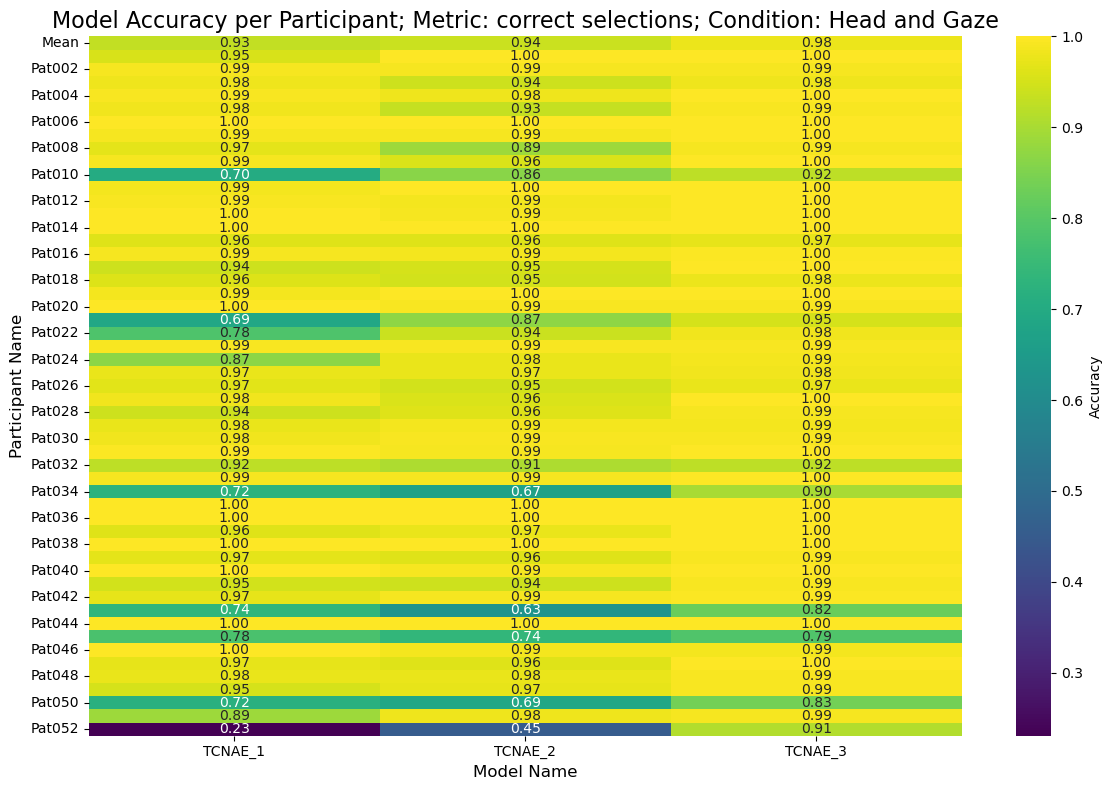

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


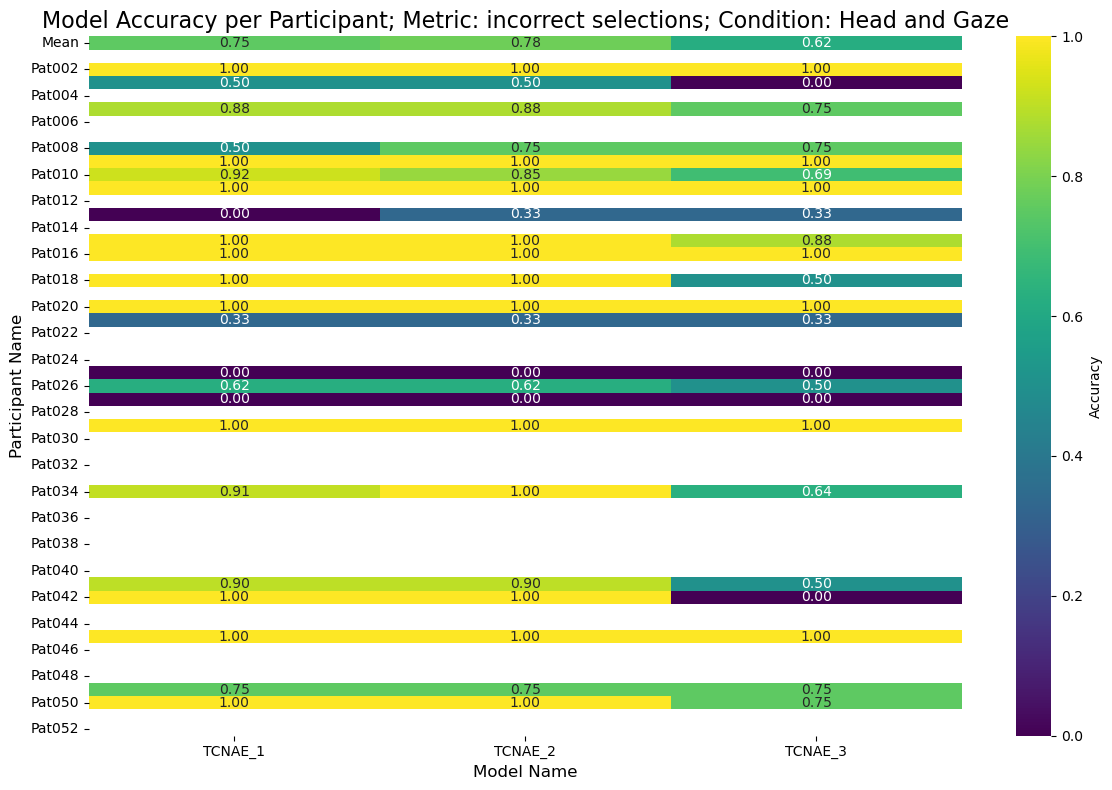

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


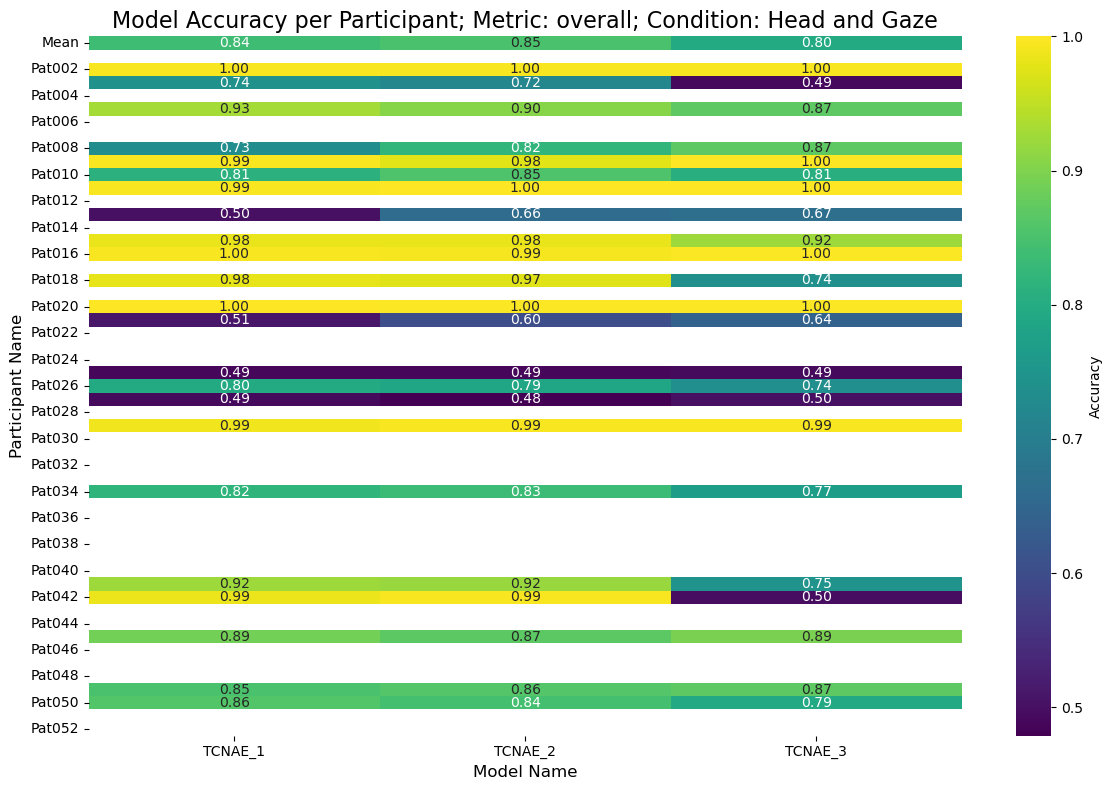

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


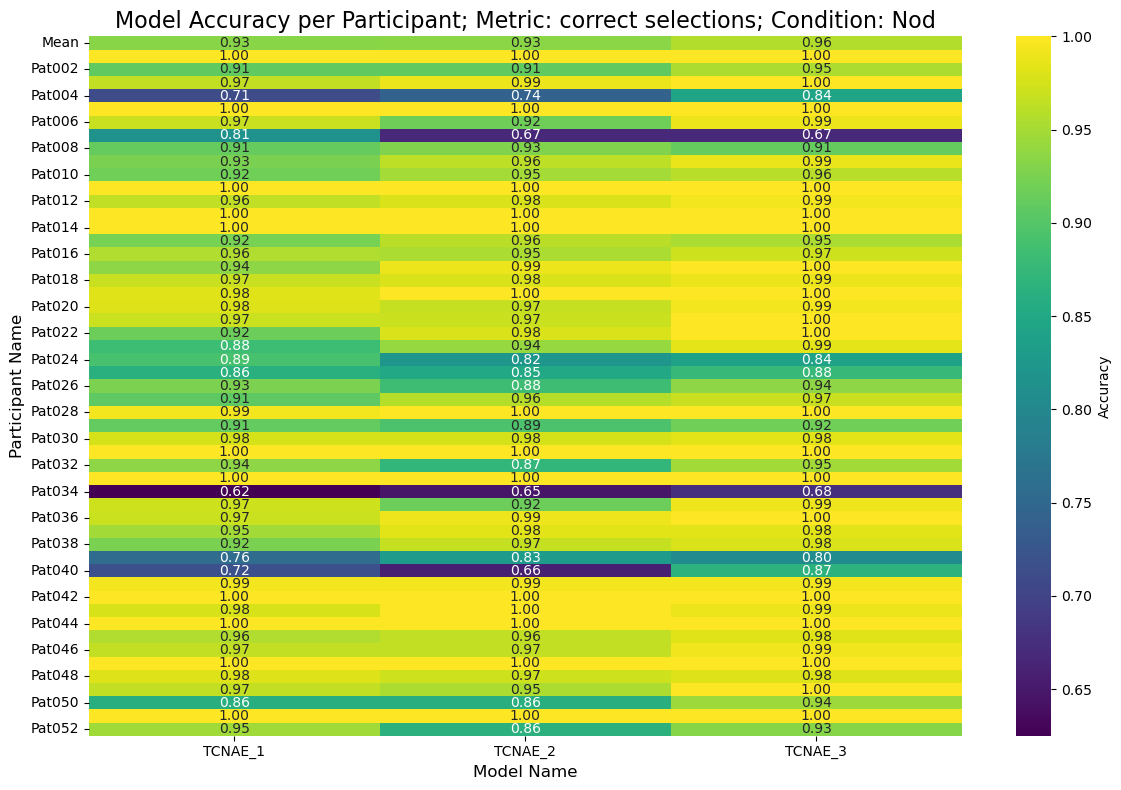

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


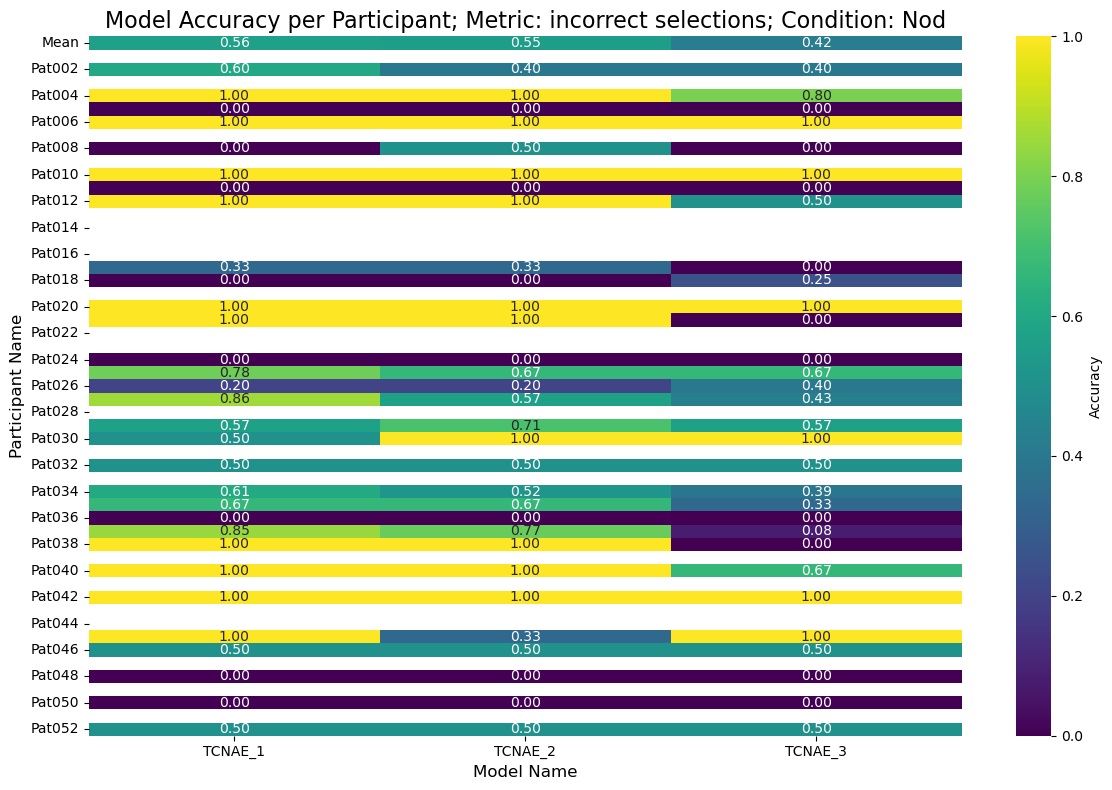

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1457050312.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "name", metric)


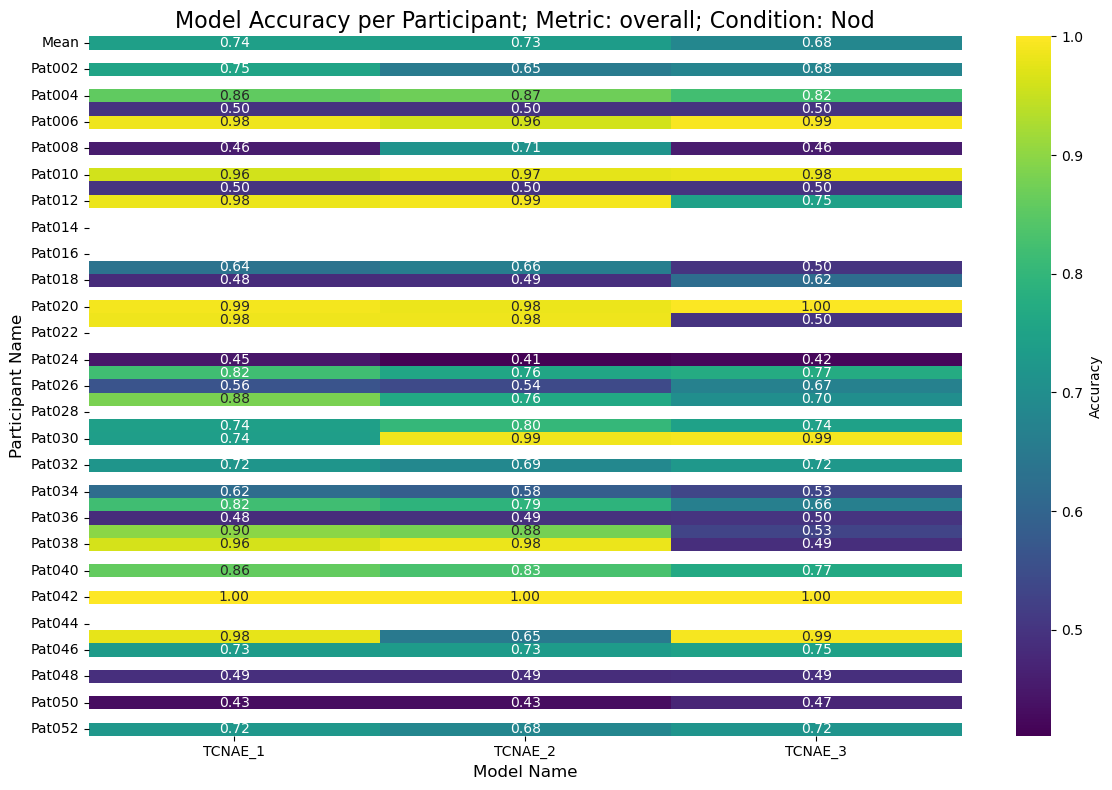

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric = "correct_acc"
condition = "nod"

metric_rename = {"correct_acc": "correct selections", "incorrect_acc": "incorrect selections", "mean_acc": "overall"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}

mean_dfs = list()

for condition in ["gaze", "headAndGaze", "nod"]:
    for metric in ["correct_acc", "incorrect_acc", "mean_acc"]:
        df = results.loc[results.cond==condition, ["name", "test_participant", metric]]

        mean_df = df.groupby("name", as_index=False)[metric].agg(np.nanmean)
        mean_df["test_participant"] = "Mean"
        df = pd.concat([df, mean_df], ignore_index=True)
        mean_df["cond"] = condition_rename[condition]
        mean_df["metric"] = metric_rename[metric]
        mean_df.rename(columns={metric: "Accuracy"}, inplace=True)
        mean_dfs.append(mean_df.copy())

        # Pivot the DataFrame
        heatmap_data = df.pivot("test_participant", "name", metric)

        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})

        # Customize the heatmap
        plt.title(f'Model Accuracy per Participant; Metric: {metric_rename[metric]}; Condition: {condition_rename[condition]}', fontsize=16)
        plt.xlabel('Model Name', fontsize=12)
        plt.ylabel('Participant Name', fontsize=12)

        plt.tight_layout()
        plt.show()


In [7]:
mean_df

,name,Accuracy,test_participant,cond,metric
0,TCNAE_1,0.741490,Mean,Nod,overall
1,TCNAE_2,0.734621,Mean,Nod,overall
2,TCNAE_3,0.684200,Mean,Nod,overall


C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2796357066.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(mean_df.pivot("metric", "name", "Accuracy"), annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2796357066.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(mean_df.pivot("metric", "name", "Accuracy"), annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2796357066.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(mean_df.pivot("metric", "name", "Accuracy"), annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})


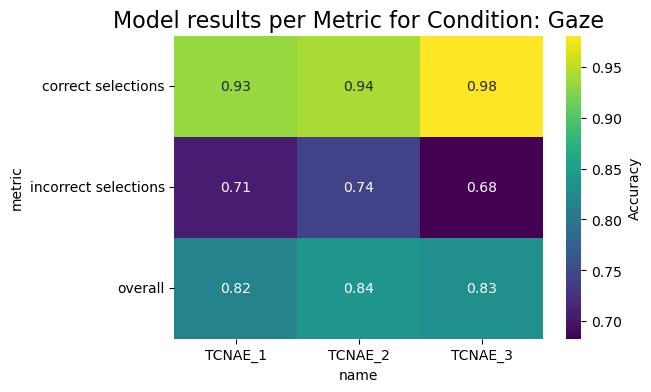

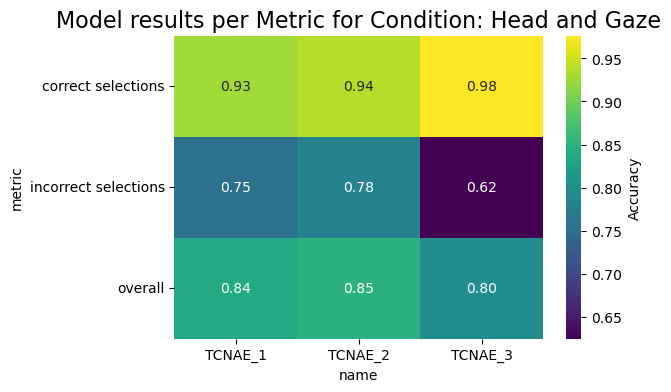

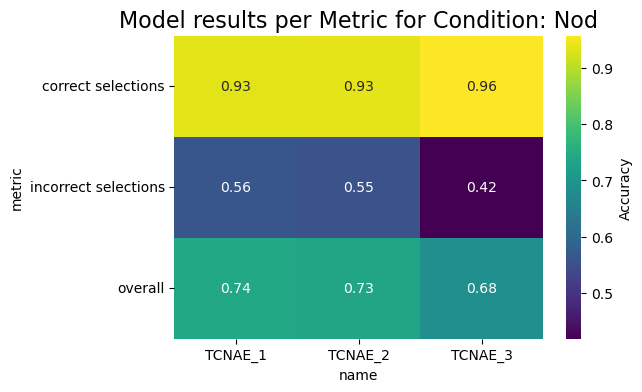

In [8]:

def cm_to_inch(cm):
    return cm / 2.54

# fig, axs = plt.subplots(1, 3, figsize=(cm_to_inch(15.11), cm_to_inch(20)), sharey=True)
# visualize the mean accuracy as heatmap
cond = "Nod"
for cond in ["Gaze", "Head and Gaze", "Nod"]:
    mean_df = pd.concat(mean_dfs, ignore_index=True)
    mean_df = mean_df.loc[mean_df.cond==cond]
    plt.figure(figsize=(cm_to_inch(15.11), cm_to_inch(10)))
    sns.heatmap(mean_df.pivot("metric", "name", "Accuracy"), annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
    plt.title(f"Model results per Metric for Condition: {cond}", fontsize=16)

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2061035707.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)


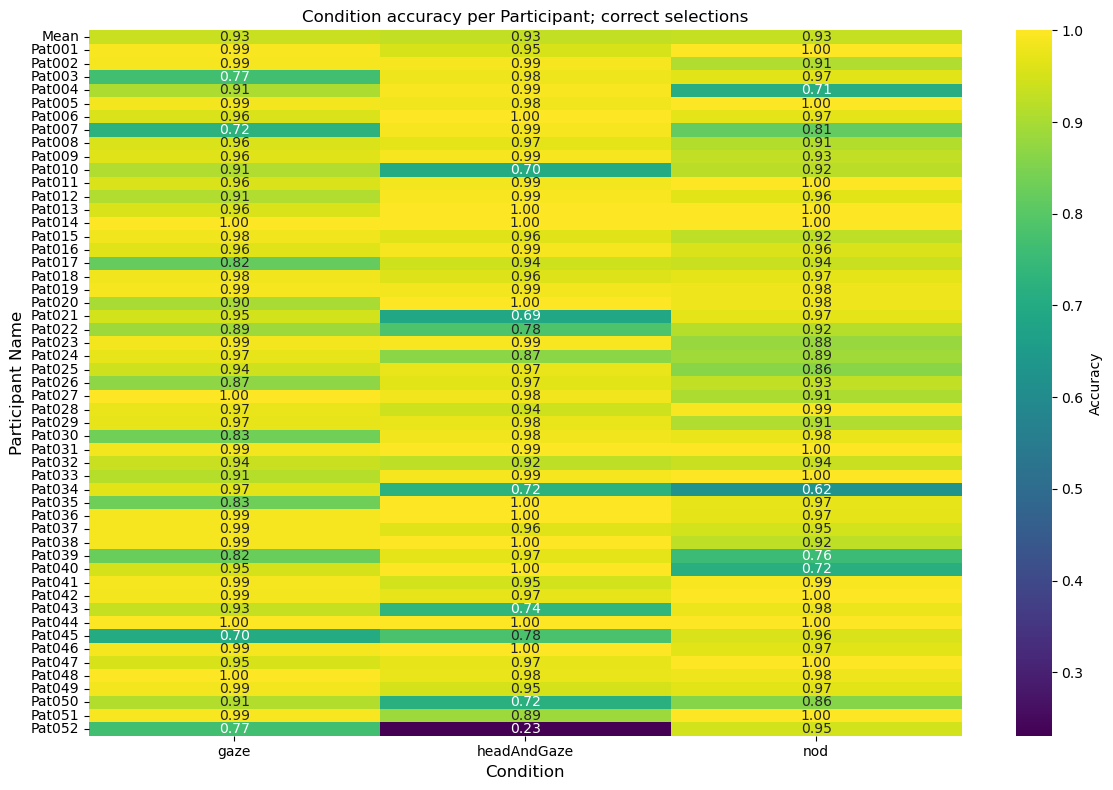

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2061035707.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)


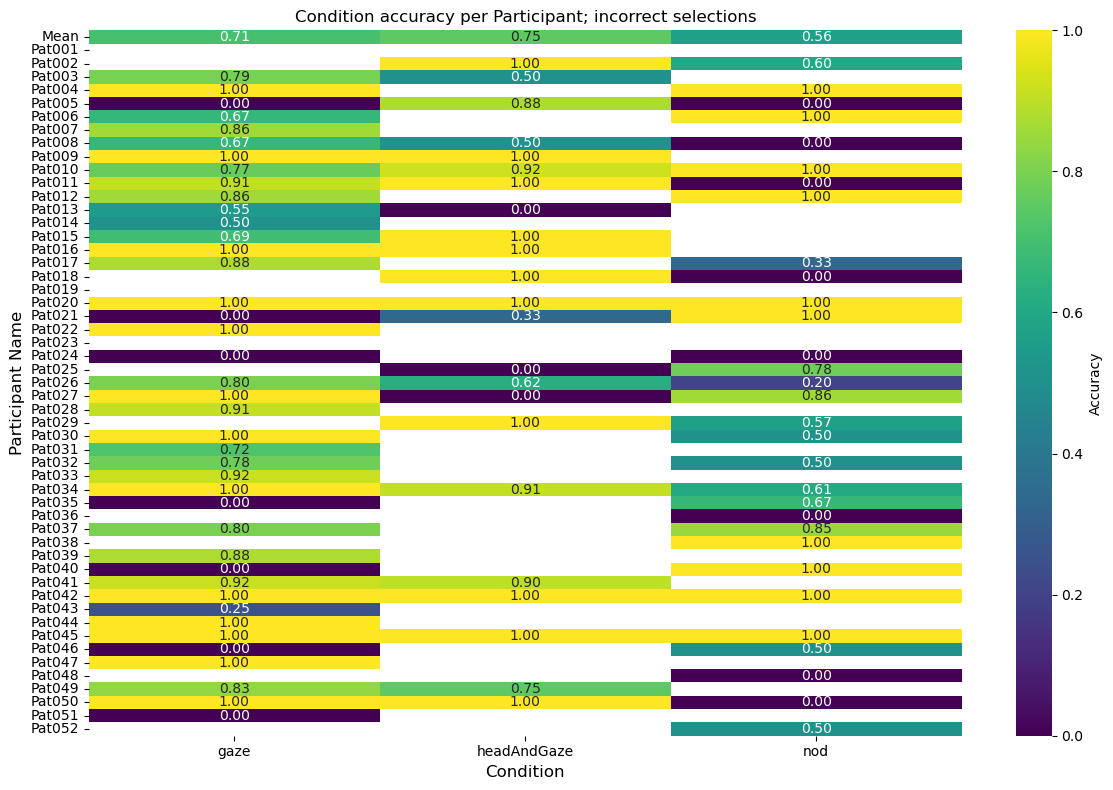

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2061035707.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)


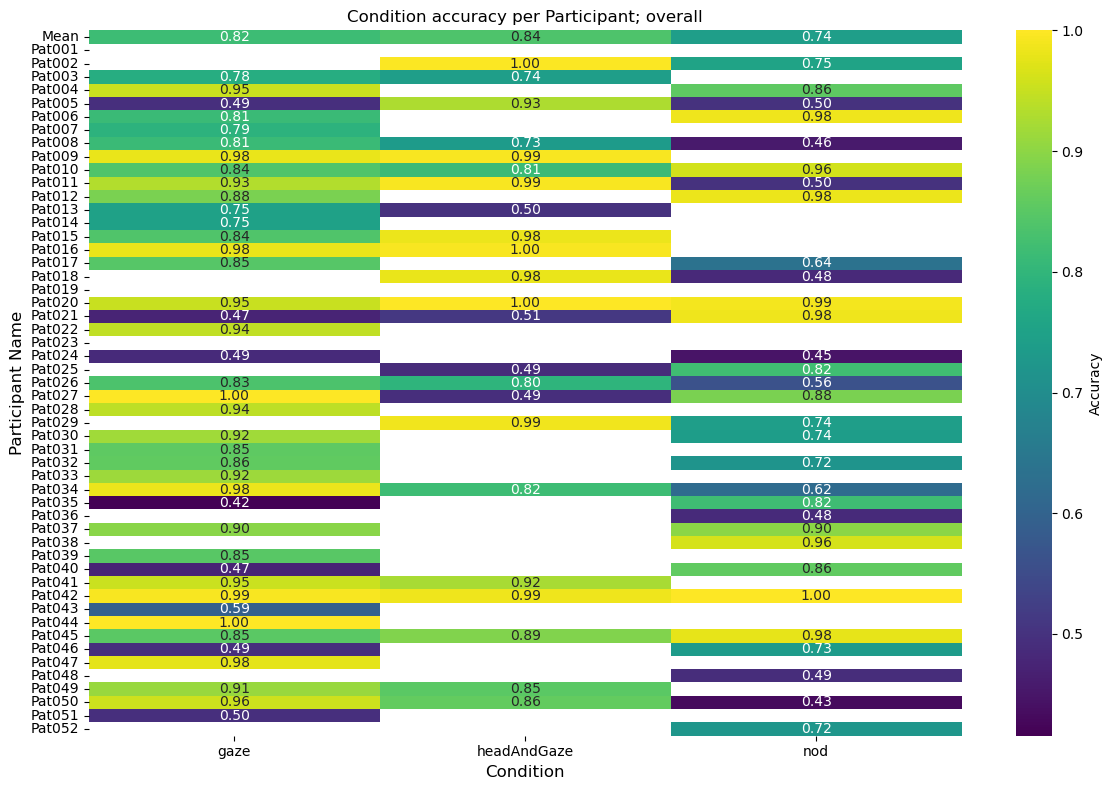

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric_rename = {"correct_acc": "correct selections", "incorrect_acc": "incorrect selections", "mean_acc": "overall"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}

# metric = "mean_acc"
for metric in ["correct_acc", "incorrect_acc", "mean_acc"]:
    df = results.loc[results.name=="TCNAE_1", ["cond", "test_participant", metric]]
    # df = results.loc[results.name.apply(lambda x: x in ["TCNAE_4", "TCNAE_8", "TCNAE_12"]), ["cond", "test_participant", metric]]
    # df = results.loc[results.name.apply(lambda x: x in ["TCNAE_2", "TCNAE_4", "TCNAE_6"]), ["cond", "test_participant", metric]]
    mean_df = df.groupby("cond", as_index=False)[metric].agg(np.nanmean)
    mean_df["test_participant"] = "Mean"
    df = pd.concat([df, mean_df], ignore_index=True)
    heatmap_data = df.pivot("test_participant", "cond", metric)
    # display(heatmap_data)
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Accuracy'}, yticklabels=True)

    plt.title(f'Condition accuracy per Participant; {metric_rename[metric]}')
    plt.xlabel("Condition", fontsize=12)
    plt.ylabel("Participant Name", fontsize=12)

    plt.tight_layout()
    plt.show()

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1680980864.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)
C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1680980864.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)
C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\1680980864.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("test_participant", "cond", metric)


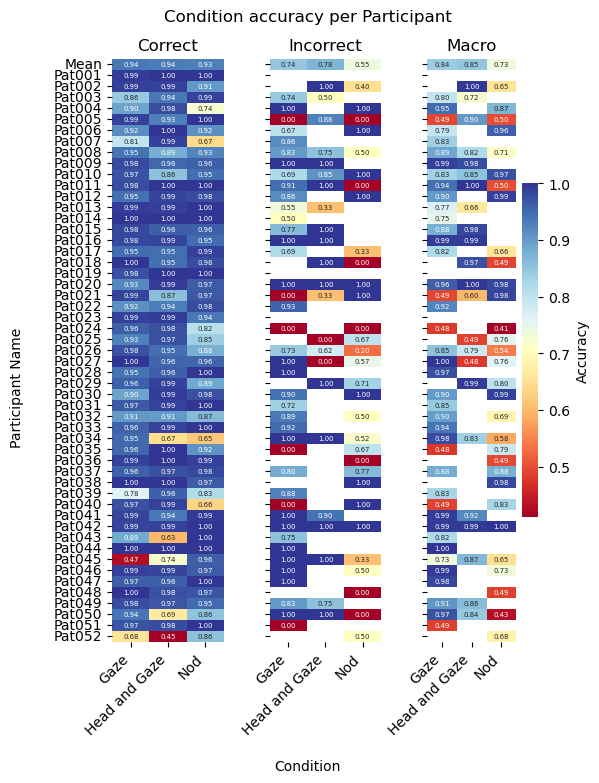

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric_rename = {"correct_acc": "Correct", "incorrect_acc": "Incorrect", "mean_acc": "Macro"}
condition_rename = {"nod": "Nod", "headAndGaze": "Head and Gaze", "gaze": "Gaze"}

def cm_to_inch(cm):
    return cm / 2.54

fig, axs = plt.subplots(1, 3, figsize=(cm_to_inch(15.11), cm_to_inch(20)), sharey=True)
# metric = "mean_acc"
for metric, ax in zip(["correct_acc", "incorrect_acc", "mean_acc"], axs):
    # df = results.loc[results.name=="TCNAE_4", ["cond", "test_participant", metric]]
    # df = results.loc[results.name.apply(lambda x: x in ["TCNAE_4", "TCNAE_8", "TCNAE_12"]), ["cond", "test_participant", metric]]
    df = results.loc[results.name.apply(lambda x: x in ["TCNAE_2", "TCNAE_4", "TCNAE_6"]), ["cond", "test_participant", metric]]
    df.cond = df.cond.apply(lambda x: condition_rename[x])
    mean_df = df.groupby("cond", as_index=False)[metric].agg(np.nanmean)
    mean_df["test_participant"] = "Mean"
    df = pd.concat([df, mean_df], ignore_index=True)
    heatmap_data = df.pivot("test_participant", "cond", metric)
    # display(heatmap_data)
    # plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlBu", yticklabels=True, annot_kws={"size":5}, ax=ax, cbar=metric == "mean_acc", cbar_kws={'label': 'Accuracy'})

    ax.set_title(f'{metric_rename[metric]}')
    ax.set_xlabel("", fontsize=1)
    ax.set_ylabel("", fontsize=1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    # ax.set_xticklabels(["Gaze", "Head and Gaze", "Nod"], rotation=45, ha='right', fontsize=10)

    # plt.title(f'Condition accuracy per Participant; {metric_rename[metric]}')
    # plt.xlabel("Condition", fontsize=12)
    # plt.ylabel("Participant Name", fontsize=12)

fig.supylabel("Participant Name", fontsize=10, x=0)
fig.supxlabel("Condition", fontsize=10)
fig.suptitle("Condition accuracy per Participant", fontsize=12)
plt.tight_layout()
plt.savefig("Results_Imgs/condition_accuracy_per_participant.png", dpi=500)
plt.show()

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2707277300.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("metric", "cond", "Accuracy")


Model: TCNAE_1


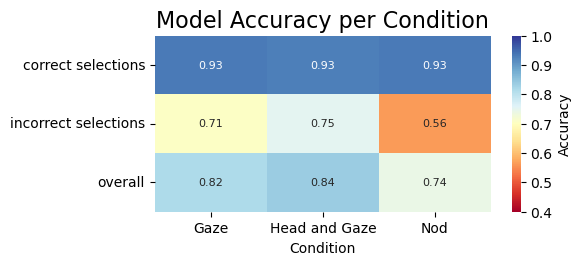

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2707277300.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("metric", "cond", "Accuracy")


Model: TCNAE_2


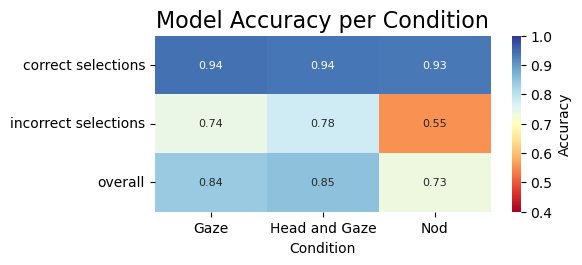

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\2707277300.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot("metric", "cond", "Accuracy")


Model: TCNAE_3


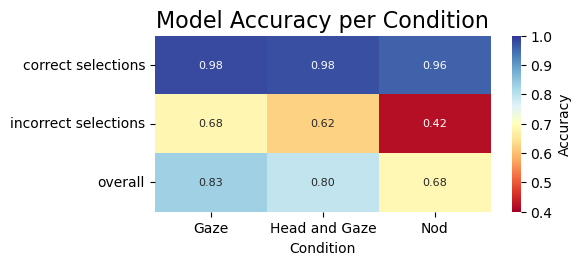

In [18]:

summary_df = pd.concat(mean_dfs)

condition = "Nod"
# model = "TCNAE_4"
# for model_nr in [1, 2, 3, 4]:
for model_nr in [1, 2, 3]:
# model_nr = 1
    # df = summary_df.loc[summary_df.name.apply(lambda x: x in ["TCNAE_%d" % x for x in [model_nr, model_nr+2, model_nr+4]]), ["cond", "metric", "Accuracy"]]
    df = summary_df.loc[summary_df.name == f"TCNAE_{model_nr}", ["cond", "metric", "Accuracy"]]

    # Pivot the DataFrame
    heatmap_data = df.pivot("metric", "cond", "Accuracy")

    print("="*80)
    print(f"Model: TCNAE_{model_nr}")
    print("="*80)
    # Plot the heatmap
    plt.figure(figsize=(cm_to_inch(15.11), cm_to_inch(7)))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlBu", annot_kws={"size":8}, cbar_kws={'label': 'Accuracy'}, vmin=00.4, vmax=1)

    # Customize the heatmap
    plt.title(f'Model Accuracy per Condition', fontsize=16, fontname="sans-serif")
    plt.xlabel('Condition', fontsize=10)
    plt.ylabel('', fontsize=10)

    plt.tight_layout()
    plt.savefig(f"Results_Imgs/model_{model_nr}_accuracy_per_condition.png", dpi=500)
    plt.show()

In [12]:
best_model_results = pd.read_csv(os.path.join(path, "end_models.csv"))
best_model_results

,model_name,cond,th_perc,correct_acc,incorrect_acc
0,TCNAE_1,gaze,99,0.989948,0.841270
1,TCNAE_1,headAndGaze,99,0.989876,0.770000
2,TCNAE_1,nod,99,0.989973,0.367521
3,TCNAE_2,gaze,95,0.949898,0.793651
4,TCNAE_2,headAndGaze,95,0.949897,0.780000
5,TCNAE_2,nod,95,0.949865,0.564103
6,TCNAE_3,gaze,99,0.989948,0.660317
7,TCNAE_3,headAndGaze,99,0.989876,0.740000
8,TCNAE_3,nod,99,0.989973,0.341880


In [13]:
import numpy as np
summary_results = results.groupby(["name", "cond"])["correct_acc", "incorrect_acc", "mean_acc"].agg([np.nanmean, np.nanstd])
summary_results# .sort_values(("mean_acc", "mean"), ascending=False)

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\820079144.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_results = results.groupby(["name", "cond"])["correct_acc", "incorrect_acc", "mean_acc"].agg([np.nanmean, np.nanstd])


correct_acc           incorrect_acc            mean_acc  \
                        nanmean    nanstd       nanmean    nanstd   nanmean   
name    cond                                                                  
TCNAE_1 gaze           0.934112  0.074952      0.705697  0.361153  0.815929   
        headAndGaze    0.928100  0.132365      0.752848  0.355633  0.837219   
        nod            0.933876  0.080841      0.563264  0.403027  0.741490   
TCNAE_2 gaze           0.941881  0.090080      0.741492  0.337229  0.839886   
        headAndGaze    0.937403  0.109119      0.778818  0.325340  0.850062   
        nod            0.934592  0.089856      0.554087  0.387057  0.734621   
TCNAE_3 gaze           0.980900  0.027873      0.682693  0.331523  0.831712   
        headAndGaze    0.976439  0.046592      0.624797  0.362664  0.795287   
        nod            0.957425  0.074222      0.418868  0.376510  0.684200   

                               
                       nanstd  
name    cond                   
TCNAE_1 gaze         0.176676  
        headAndGaze  0.180339  
        nod          0.198125  
TCNAE_2 gaze         0.165511  
        headAndGaze  0.161428  
        nod          0.193401  
TCNAE_3 gaze         0.166046  
        headAndGaze  0.178315  
        nod          0.189822

In [14]:
groupby_cols = ["num_channels", "kernel_size", "latent_dim", "learning_rate", "th_percentile"]
summary_results = results.groupby(groupby_cols)["correct_acc", "incorrect_acc", "mean_acc"].agg(["mean", "std"])
summary_results.sort_values(("mean_acc", "mean"), ascending=False)

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_6824\3995559188.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary_results = results.groupby(groupby_cols)["correct_acc", "incorrect_acc", "mean_acc"].agg(["mean", "std"])


correct_acc  \
                                                                       mean   
num_channels kernel_size latent_dim learning_rate th_percentile               
[8, 16]      5           16         0.0001        95               0.937958   
[16, 32, 64] 7           10         0.0010        99               0.932029   
             3           10         0.0001        99               0.971588   

                                                                           \
                                                                      std   
num_channels kernel_size latent_dim learning_rate th_percentile             
[8, 16]      5           16         0.0001        95             0.096194   
[16, 32, 64] 7           10         0.0010        99             0.098850   
             3           10         0.0001        99             0.053729   

                                                                incorrect_acc  \
                                                                         mean   
num_channels kernel_size latent_dim learning_rate th_percentile                 
[8, 16]      5           16         0.0001        95                 0.689376   
[16, 32, 64] 7           10         0.0010        99                 0.670635   
             3           10         0.0001        99                 0.582586   

                                                                           \
                                                                      std   
num_channels kernel_size latent_dim learning_rate th_percentile             
[8, 16]      5           16         0.0001        95             0.360772   
[16, 32, 64] 7           10         0.0010        99             0.378067   
             3           10         0.0001        99             0.369379   

                                                                 mean_acc  \
                                                                     mean   
num_channels kernel_size latent_dim learning_rate th_percentile             
[8, 16]      5           16         0.0001        95             0.808000   
[16, 32, 64] 7           10         0.0010        99             0.796793   
             3           10         0.0001        99             0.774758   

                                                                           
                                                                      std  
num_channels kernel_size latent_dim learning_rate th_percentile            
[8, 16]      5           16         0.0001        95             0.179848  
[16, 32, 64] 7           10         0.0010        99             0.187057  
             3           10         0.0001        99             0.186805

In [15]:
results.loc[(results.num_channels=="[8, 16]") & (results.kernel_size==3) & (results.latent_dim==10) & (results.learning_rate==1e-2) & (results.th_percentile==99)].groupby("cond")[["correct_acc", "incorrect_acc", "mean_acc"]].agg(["mean", "std"])

Empty DataFrame
Columns: [(correct_acc, mean), (correct_acc, std), (incorrect_acc, mean), (incorrect_acc, std), (mean_acc, mean), (mean_acc, std)]
Index: []

In [16]:
np.nanstd([1, np.nan, 2, 3])

0.816496580927726